In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

In [26]:
#Reading data from file and setting index to the 'date' column.
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date', parse_dates = True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [27]:
#filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df['value'] >= df['value'].quantile(0.025)) &
        (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


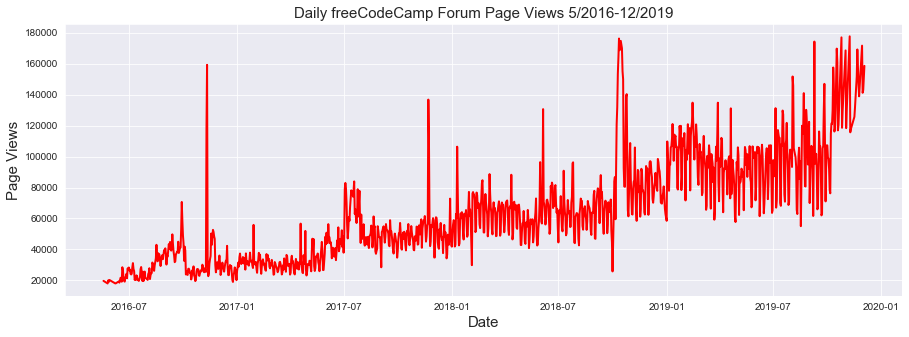

In [28]:
#line plot
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df.index, df["value"], color = 'red', linewidth = 2)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('Page Views', fontsize = 15)
plt.show()

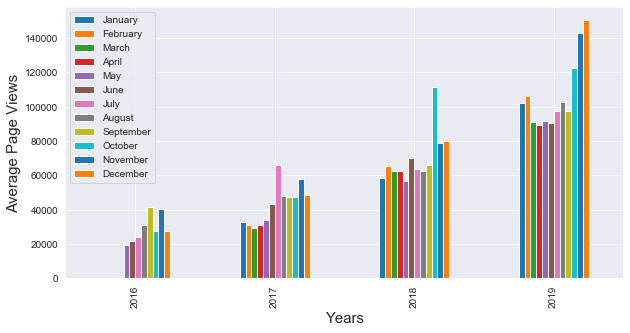

In [29]:
#bar plot
df['month'] = df.index.month
df['year'] = df.index.year
df_bar = df.groupby(['year', 'month'])['value'].mean()
df_bar = df_bar.unstack()
fig = df_bar.plot(kind = 'bar', legend = True, figsize = (10,5)).figure
plt.xlabel('Years', fontsize = 15)
plt.ylabel('Average Page Views', fontsize = 15)
plt.legend(labels = ['January', 'February', 'March', 
                    'April', 'May', 'June',
                    'July', 'August', 'September',
                    'October', 'November', 'December'], fontsize = 10)
plt.show()

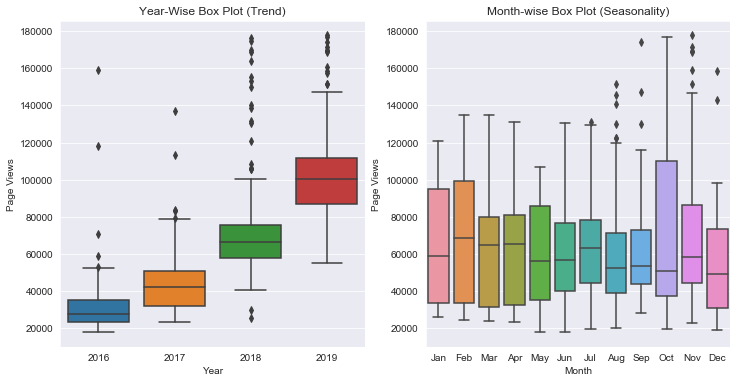

In [33]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values("month_num")

fig, axes = plt.subplots(nrows = 1, ncols = 2,
                      figsize = (12,6))
axes[0] = sns.boxplot(x = df_box['year'],
                   y = df_box['value'],
                   ax = axes[0])
axes[1] = sns.boxplot(x = df_box['month'],
                   y = df_box['value'],
                   ax = axes[1])

axes[0].set_title('Year-Wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
plt.show()